In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
#In this workbook, we will be looking at the left guard position
lg = df[df['Position'] == 'LG']

In [5]:
lgcols = list(lg.columns.values)

In [6]:
print(lgcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [10]:
lg1 = lg[['Overall Rating', '3Cone', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Bench', 'Block Shedding',
          'Broad Jump', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power',
          'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Pass Block', 'Play Action', 'Play Recognition',
          'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Shuttle', 'Speed', 'Spin Move', 'Stamina',
          'Stiff Arm', 'Strength', 'Tackle', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short',
          'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking','Vertical', 'Zone Coverage']]

In [11]:
lgcorr = lg1.corr()

In [12]:
lgpos = lgcorr[lgcorr['Overall Rating'] >= 0.5]

In [13]:
lgneg = lgcorr[lgcorr['Overall Rating'] <= -0.5]

In [14]:
print(lgpos['Overall Rating'], lgneg['Overall Rating'])
#Here are the positive significant variables.
#There are no significant negative variables

Overall Rating     1.000000
Awareness          0.874618
Impact Blocking    0.524842
Pass Block         0.768595
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [15]:
lgsig = lg[['Awareness', 'Impact Blocking', 'Pass Block']]
X = add_constant(lgsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like all of the varibles are already below 5.  Let's move on to the statistical summaries

const              310.444696
Awareness            1.621967
Impact Blocking      1.236699
Pass Block           1.500029
dtype: float64

In [16]:
LG = sm.OLS(lg['Overall Rating'], lgsig).fit()
print(LG.summary())
#It looks like all of our statistics are significant too.  On to the training and testing!
#We will also create a function that shows the regression equation as well

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.991e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          7.36e-185
Time:                        01:12:17   Log-Likelihood:                -287.51
No. Observations:                 127   AIC:                             581.0
Df Residuals:                     124   BIC:                             589.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3421      0.020     

In [17]:
def model():
    pv = (0.3421*lg['Awareness'])+(0.1643*lg['Impact Blocking'])+(0.4592*lg['Pass Block'])
    return pv

In [18]:
reg = LinearRegression()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(lgsig, lg['Overall Rating'], test_size = 0.3, random_state=42)

In [20]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = reg.predict(X_test)


In [21]:
lgcv = cross_val_score(reg, lgsig, lg['Overall Rating'], cv =5)

In [22]:
lgcv_mean = np.mean(lgcv)

In [23]:
print(lgcv, lgcv_mean)
#It looks like our model successfully explained an average of 85.71% of the variation in the data. 

[0.90937863 0.89718754 0.9237642  0.73017845 0.82522057] 0.8571458764756226


In [24]:
lg['Predicted Value'] = model()

In [26]:
lg['Residual'] = lg['Predicted Value'] - lg['Overall Rating']

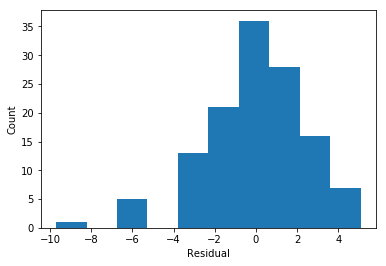

In [27]:
plt.hist(lg['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
#Looks like there might be a few outliers

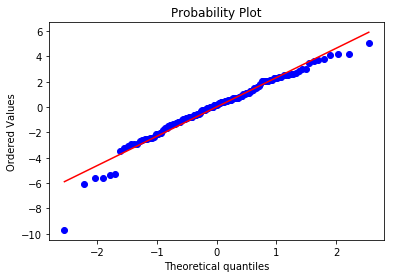

In [29]:
stats.probplot(lg['Residual'], plot=plt)
plt.show()
#We will next remove the data point in the bottom left that is all by itself

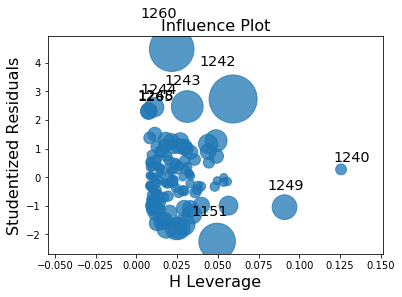

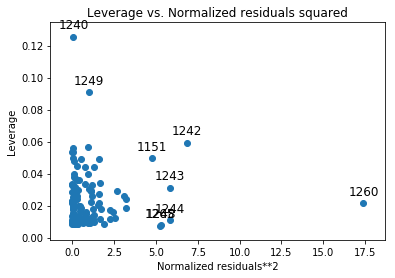

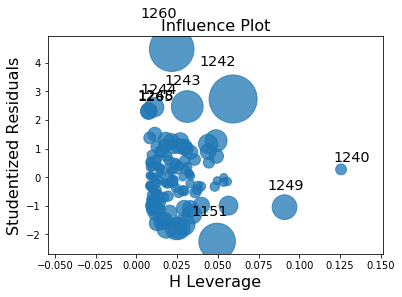

In [31]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LG)
influence_plot(LG)
#There are several high residuals and several high leverage points but no points that meet both criteria so we will keep
#that data in the model

In [ ]:
cbcorr1 = cbul[['Overall Rating', 'Awareness', 'Impact Blocking', 'Man Coverage', 'Stamina']].corr()
plot_acf(cbcorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.746, which indicates no significant autocoreelation

In [ ]:
#Finally, we check for homoskedasticity
het_breuschpagan(cbul['Residual'], cbulsig)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(lgsig, lg['Overall Rating'], test_size = 0.3, random_state =42)
reg.fit(X_train, y_train)
lgcv = cross_val_score(reg, lgsig, lg['Overall Rating'], cv=5)
lgcv_mean = np.mean(lgcv)
print(lgcv, lgcv_mean)
#It looks like the model average improved a little bit by removing the outlier.

[0.90937863 0.89718754 0.9237642  0.73017845 0.82522057] 0.8571458764756226


In [32]:
X_train, X_test, y_train, y_test = train_test_split(lg2sig, lg2['Overall Rating'], test_size = 0.3, random_state =42)

In [33]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lg2cv = cross_val_score(reg, lg2sig, lg2['Overall Rating'], cv=5)

In [35]:
lg2cv_mean = np.mean(lg2cv)

In [36]:
print(lg2cv, lg2cv_mean)
#It looks like the model average improved a little bit by removing the outlier.

[0.90919792 0.9043367  0.92908288 0.70589722 0.86477024] 0.8626569906240729


In [37]:
print(lgcv, lgcv_mean)

[0.90937863 0.89718754 0.9237642  0.73017845 0.82522057] 0.8571458764756226


In [38]:
lg2['Predicted Values'] = model1()

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
lg2['Residual'] = lg2['Predicted Value'] - lg2['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


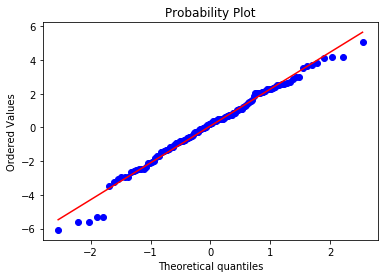

In [40]:
stats.probplot(lg2['Residual'], plot=plt)
plt.show()
#The residuals appear to be evenly distributed

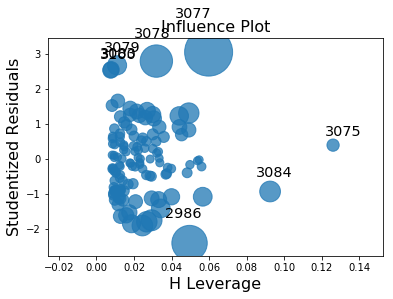

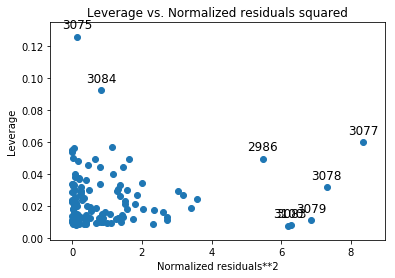

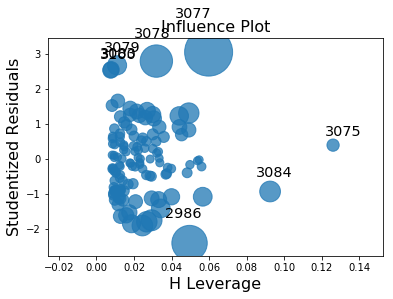

In [42]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LG1)
influence_plot(LG1)
#It looks like point 3077 is a high residual, high leverage point so we will remove it from the model and retest

In [44]:
lgunleveraged1 = lg2.drop(df.index[3077])
lgunleveraged1.shape

(125, 174)

In [46]:
lg.shape
#It looks like it dropped an extra point.  It doesn't say which one but we will continue testing and see what happens

(127, 173)

In [47]:
print(LG1.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.543e+04
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          4.84e-187
Time:                        23:12:12   Log-Likelihood:                -276.25
No. Observations:                 126   AIC:                             558.5
Df Residuals:                     123   BIC:                             567.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3368      0.019     

In [49]:
lgclean = lgunleveraged1[['Overall Rating', 'Awareness', 'Impact Blocking', 'Pass Block']]
lgcleansig = lgclean[['Awareness', 'Impact Blocking', 'Pass Block']]
LG2 =sm.OLS(lgclean['Overall Rating'], lgcleansig).fit()
print(LG2.summary())
#It looks like removing that point lowered the AIC score by 12 points
#It also moved the skew closer to 0 and the kurtosis closer to 3
#It also increased the durbin watson statistic closer to 2 so it reduced some of the autocorelation

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.794e+04
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          3.69e-187
Time:                        23:15:31   Log-Likelihood:                -269.98
No. Observations:                 125   AIC:                             546.0
Df Residuals:                     122   BIC:                             554.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3240      0.019     

In [50]:
def model():
    pv=0.3240*lgclean['Awareness']+ 0.1756*lgclean['Impact Blocking']+ 0.4625*lgclean['Pass Block']
    return pv

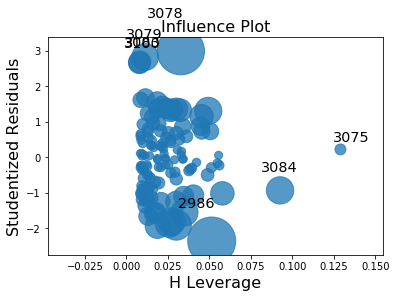

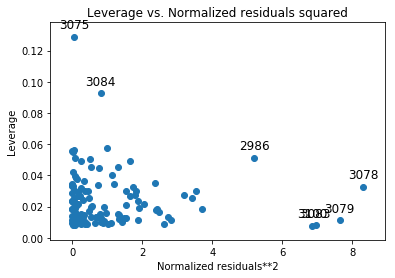

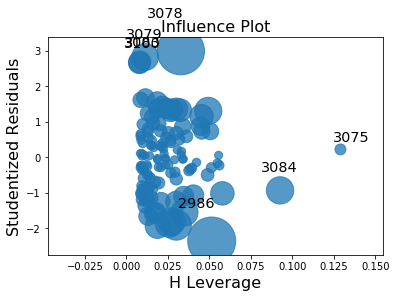

In [51]:
#We will now check to see if we have any other high influence points
plot_leverage_resid2(LG2)
influence_plot(LG2)
#There are still some high residual points but they are low leverage to the model
#There are also some high leverage points but they have low residuals
#The residuals of the influence plot look very much like a normal distribution so that graph looks good.

In [53]:
lgcleancorr = lgclean.corr()

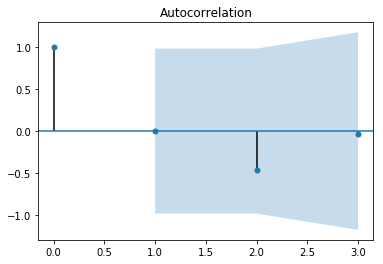

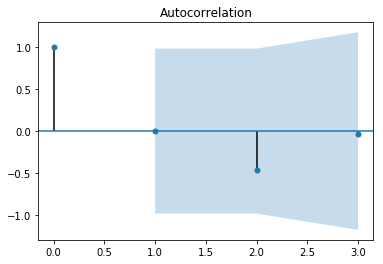

In [54]:
plot_acf(lgcleancorr['Overall Rating'])
#It doesn't look like there is any autocorrelation

In [58]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
lgclean['Predicted Value'] = model()
lgclean['Residuals'] = lgclean['Predicted Value'] - lgclean['Overall Rating']
het_breuschpagan(lgclean['Residuals'], lgcleansig)
#Based on the extremely low p-values, we reject the hypothesis that a significant amount of heteroskedasticity is present

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(39.55587913039338,
 2.573652951868137e-09,
 18.82640648567855,
 4.2306503916764625e-10)

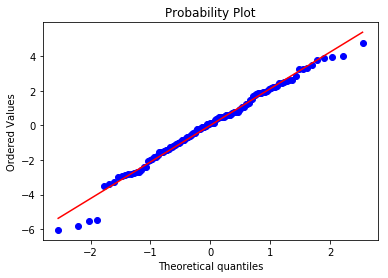

In [59]:
stats.probplot(lgclean['Residuals'], plot=plt)
plt.show()
#The residuals look normally distributed

In [34]:
lgdesc1 = lg[['Overall Rating', 'Awareness', 'Impact Blocking', 'Pass Block']]
lgdesc = lgdesc1.describe()
lgdesc.to_csv('C:\\Users\\tilleymusprime\\Desktop\\lgdesc.csv')

In [64]:
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(lgcleansig, lgclean['Overall Rating'], test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
lgcv = cross_val_score(reg, lgcleansig, lgclean['Overall Rating'], cv=5)
lgcv_mean = np.mean(lgcv)
print(lgcv, lgcv_mean)
#It looks like on average, our previous model explains 85.54% of the variation in the data
#This model explains 85.74% of the variation in the data.  A small improvement

[0.90941607 0.9183565  0.94015054 0.7101916  0.8579402 ] 0.8672109833363549
